<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [5]:
processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1125,287,201506,-17.068,15.271,298.479,292.966,307.924,293.551,0.000030,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,1963,287,201507,-17.068,15.271,300.038,296.358,304.813,295.583,0.039828,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,2801,287,201508,-17.068,15.271,300.277,297.167,304.959,297.178,0.201599,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,3639,287,201509,-17.068,15.271,300.453,296.962,304.370,297.498,0.118411,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,79997,387,202304,51.204,11.678,299.834,294.269,306.253,293.895,0.005088,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,80835,387,202305,51.204,11.678,301.408,294.354,307.231,295.266,0.019854,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,81673,387,202306,51.204,11.678,302.933,296.843,309.328,292.453,0.000158,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,82511,387,202307,51.204,11.678,304.032,299.200,309.950,290.167,0.000038,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [6]:
!pip install pandas networkx


In [7]:
import networkx as nx

# For an undirected graph
G = nx.Graph()
from geopy.distance import geodesic

In [ ]:
# Add nodes with features
for index, row in processed_dataset.iterrows():
    G.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")



finished creating node features


In [ ]:
processed_dataset['Month']

0        201505
1        201506
2        201507
3        201508
4        201509
          ...  
83575    202304
83576    202305
83577    202306
83578    202307
83579    202308
Name: Month, Length: 83580, dtype: int64

In [11]:
sort_processed_dataset = processed_dataset.sort_values(by=['Lat','Lon','Month'])
sort_processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1125,287,201506,-17.068,15.271,298.479,292.966,307.924,293.551,0.000030,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,1963,287,201507,-17.068,15.271,300.038,296.358,304.813,295.583,0.039828,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,2801,287,201508,-17.068,15.271,300.277,297.167,304.959,297.178,0.201599,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,3639,287,201509,-17.068,15.271,300.453,296.962,304.370,297.498,0.118411,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,79997,387,202304,51.204,11.678,299.834,294.269,306.253,293.895,0.005088,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,80835,387,202305,51.204,11.678,301.408,294.354,307.231,295.266,0.019854,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,81673,387,202306,51.204,11.678,302.933,296.843,309.328,292.453,0.000158,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,82511,387,202307,51.204,11.678,304.032,299.200,309.950,290.167,0.000038,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [ ]:
curLat=0
curLon=0
curNode=0
curCt=0
totalEdge=0
ct=0
# Add edges of same point to the first month
for i, row_i in sort_processed_dataset.iterrows():
      lat=row_i['Lat']
      lon=row_i['Lon']

      if (lat == curLat) & (lon == curLon):
            G.add_edge(curNode, i)
            curCt = curCt+1
      else:
            curLat = lat
            curLon = lon
            curNode = i
            totalEdge = totalEdge + curCt
            ct=ct+1
            if totalEdge !=0 :
              print("Total edge ",totalEdge)
            print("Start Node no, i, lat, lon ", ct, i, lat, lon)
            curCt = 0

totalEdge = totalEdge + curCt
print("Total edge ",totalEdge)
print("finished adding edges")


Start Node no, i, lat, lon  1 0 -17.068 15.271
Total edge  99
Start Node no, i, lat, lon  2 100 -15.271 11.678
Total edge  198
Start Node no, i, lat, lon  3 200 -15.271 13.475
Total edge  297
Start Node no, i, lat, lon  4 300 -15.271 15.271
Total edge  396
Start Node no, i, lat, lon  5 400 -15.271 17.068
Total edge  495
Start Node no, i, lat, lon  6 500 -15.271 18.865
Total edge  594
Start Node no, i, lat, lon  7 600 -15.271 20.661
Total edge  693
Start Node no, i, lat, lon  8 700 -15.271 22.458
Total edge  792
Start Node no, i, lat, lon  9 800 -15.271 24.255
Total edge  891
Start Node no, i, lat, lon  10 900 -15.271 27.848
Total edge  990
Start Node no, i, lat, lon  11 1000 -13.475 9.881
Total edge  1089
Start Node no, i, lat, lon  12 1100 -13.475 11.678
Total edge  1188
Start Node no, i, lat, lon  13 1200 -13.475 13.475
Total edge  1287
Start Node no, i, lat, lon  14 1300 -13.475 15.271
Total edge  1386
Start Node no, i, lat, lon  15 1400 -13.475 17.068
Total edge  1485
Start Node no

**Temporal Graph**

In [8]:
Temporal_graph = nx.DiGraph()

In [9]:
# Add nodes with features
for index, row in processed_dataset.iterrows():
    Temporal_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [13]:
curLat=0
curLon=0
prevNode=0
monthCt=0
totalEdge=0
ct=0
# Add edges between adjacent months
for i, row_i in sort_processed_dataset.iterrows():

      #Error detection
      if prevNode == i:
        print("Error 1")
        print(prevNode, i)
      elif prevNode+1 != i:
        print("Error 2")
        print(prevNode, i)

      lat=row_i['Lat']
      lon=row_i['Lon']

      if (lat == curLat) & (lon == curLon):
            Temporal_graph.add_edge(prevNode, i)
            monthCt = monthCt+1
            prevNode = i
      else:
            curLat = lat
            curLon = lon
            curNode = i
            totalEdge = totalEdge + monthCt
            ct=ct+1
            prevNode = i
            if totalEdge !=0 :
              print("Total edge ",totalEdge)
            print("Start Node number, i, lat, lon, prevNode", ct, i, lat, lon, prevNode)
            monthCt = 0

totalEdge = totalEdge + monthCt
print("Total edge ",totalEdge)
print("finished adding edges")

Error 1
0 0
Start Node number, i, lat, lon, prevNode 1 0 -17.068 15.271 0
Total edge  99
Start Node number, i, lat, lon, prevNode 2 100 -15.271 11.678 100
Total edge  198
Start Node number, i, lat, lon, prevNode 3 200 -15.271 13.475 200
Total edge  297
Start Node number, i, lat, lon, prevNode 4 300 -15.271 15.271 300
Total edge  396
Start Node number, i, lat, lon, prevNode 5 400 -15.271 17.068 400
Total edge  495
Start Node number, i, lat, lon, prevNode 6 500 -15.271 18.865 500
Total edge  594
Start Node number, i, lat, lon, prevNode 7 600 -15.271 20.661 600
Total edge  693
Start Node number, i, lat, lon, prevNode 8 700 -15.271 22.458 700
Total edge  792
Start Node number, i, lat, lon, prevNode 9 800 -15.271 24.255 800
Total edge  891
Start Node number, i, lat, lon, prevNode 10 900 -15.271 27.848 900
Total edge  990
Start Node number, i, lat, lon, prevNode 11 1000 -13.475 9.881 1000
Total edge  1089
Start Node number, i, lat, lon, prevNode 12 1100 -13.475 11.678 1100
Total edge  1188
S

In [14]:
def display_a_to_b_nodes(graph, a, b):
    # Extract the first 200 nodes
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with the first 200 nodes
    subgraph = graph.subgraph(nodes_subset)

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
    plt.show()

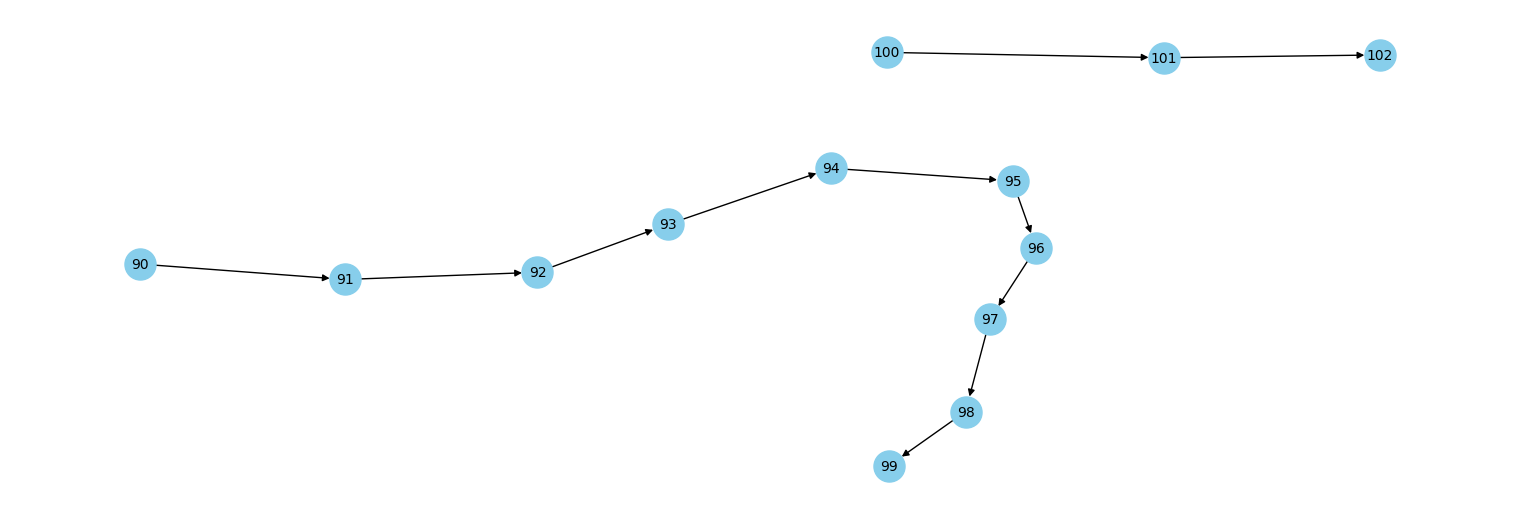

In [15]:
display_a_to_b_nodes(Temporal_graph, 90, 103)

In [16]:
#Access node attibutes for the 80th node
Temporal_graph.nodes[list(Temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [18]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/